In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Trees

In [6]:
depths = list(range(3,11))
branching_factors = list(range(2,5))

results = np.zeros((len(depths), len(branching_factors), 4))

In [7]:
for d_idx, d in enumerate(depths):
    results[d_idx] = np.load('tree/tree_depth{}.npy'.format(d))

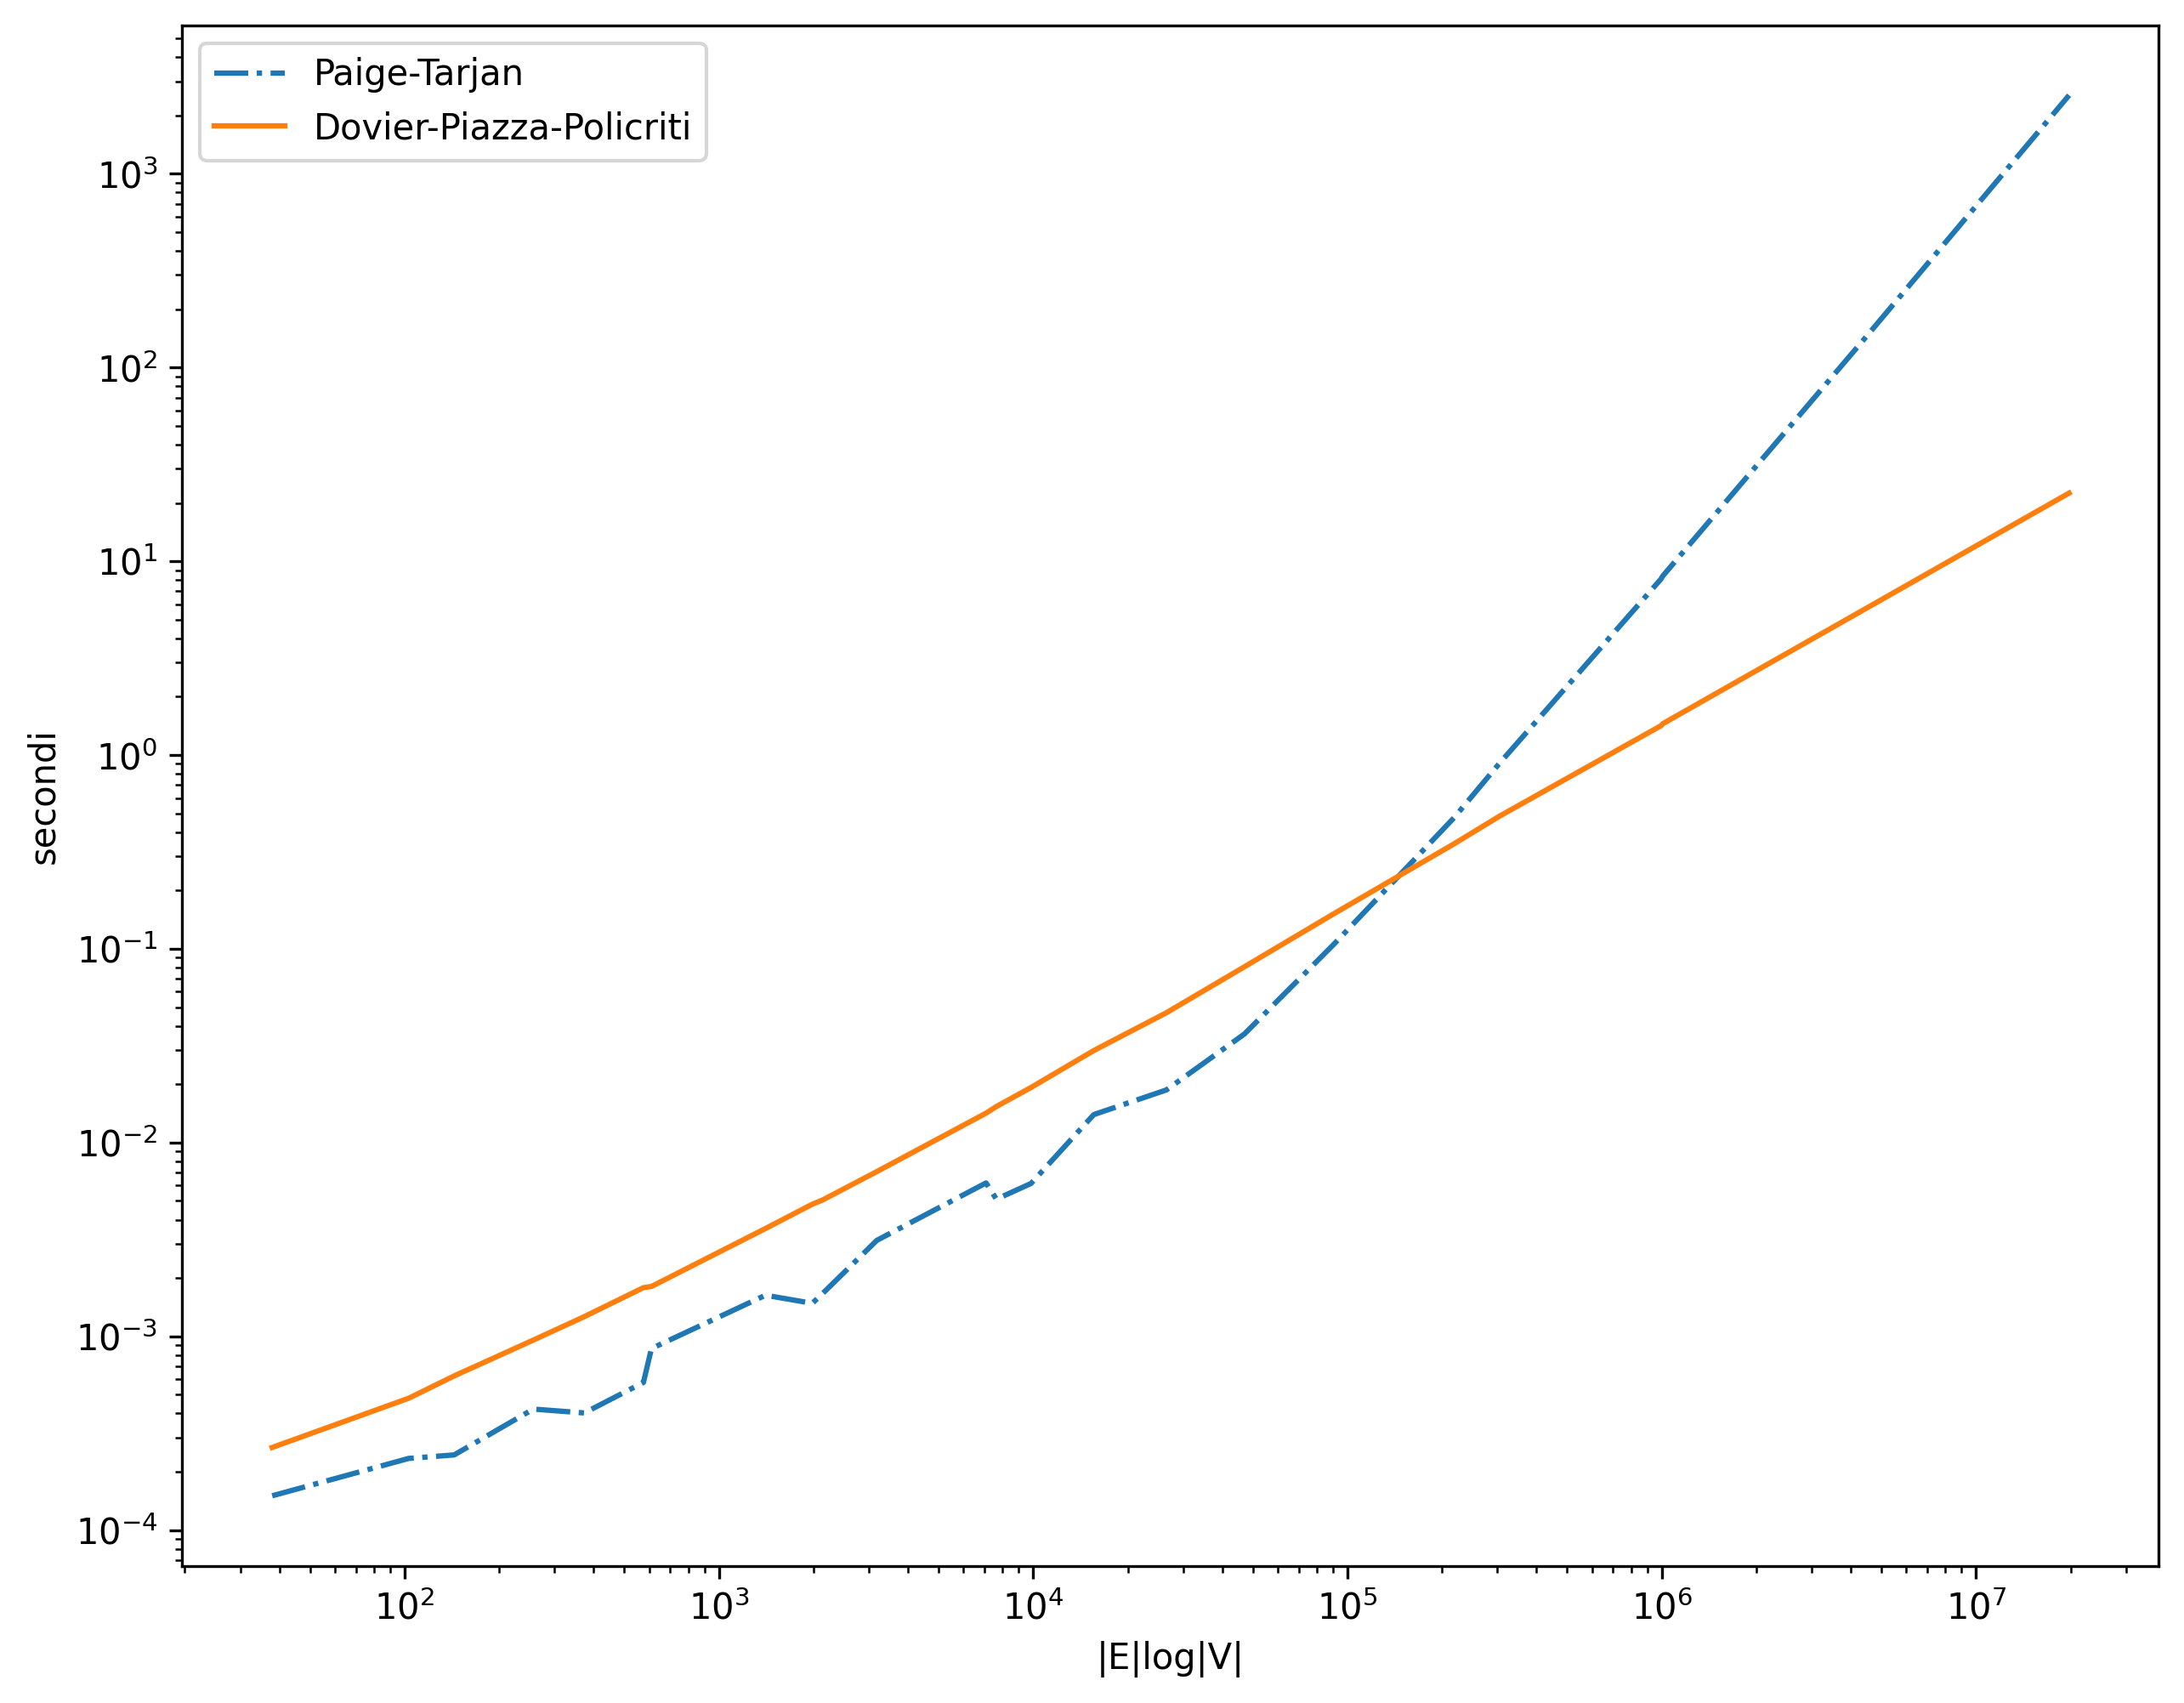

In [8]:
import math

x = []
pta = []
fba = []

for d_idx, d in enumerate(depths):
    for r_idx,r in enumerate(branching_factors):
        x.append(math.log(results[d_idx, r_idx, 2]) * results[d_idx, r_idx, 3])
        pta.append(results[d_idx, r_idx, 0])
        fba.append(results[d_idx, r_idx, 1])
        
x, pta, fba = zip(*sorted(zip(x, pta, fba)))
        
plt.figure(figsize=(10,8), dpi=300)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.')
plt.plot(x, fba, label='Dovier-Piazza-Policriti')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

# Hopcroft

In [54]:
data = np.load('hopcroft/result_second_class.npy')
data.shape

(11, 4)

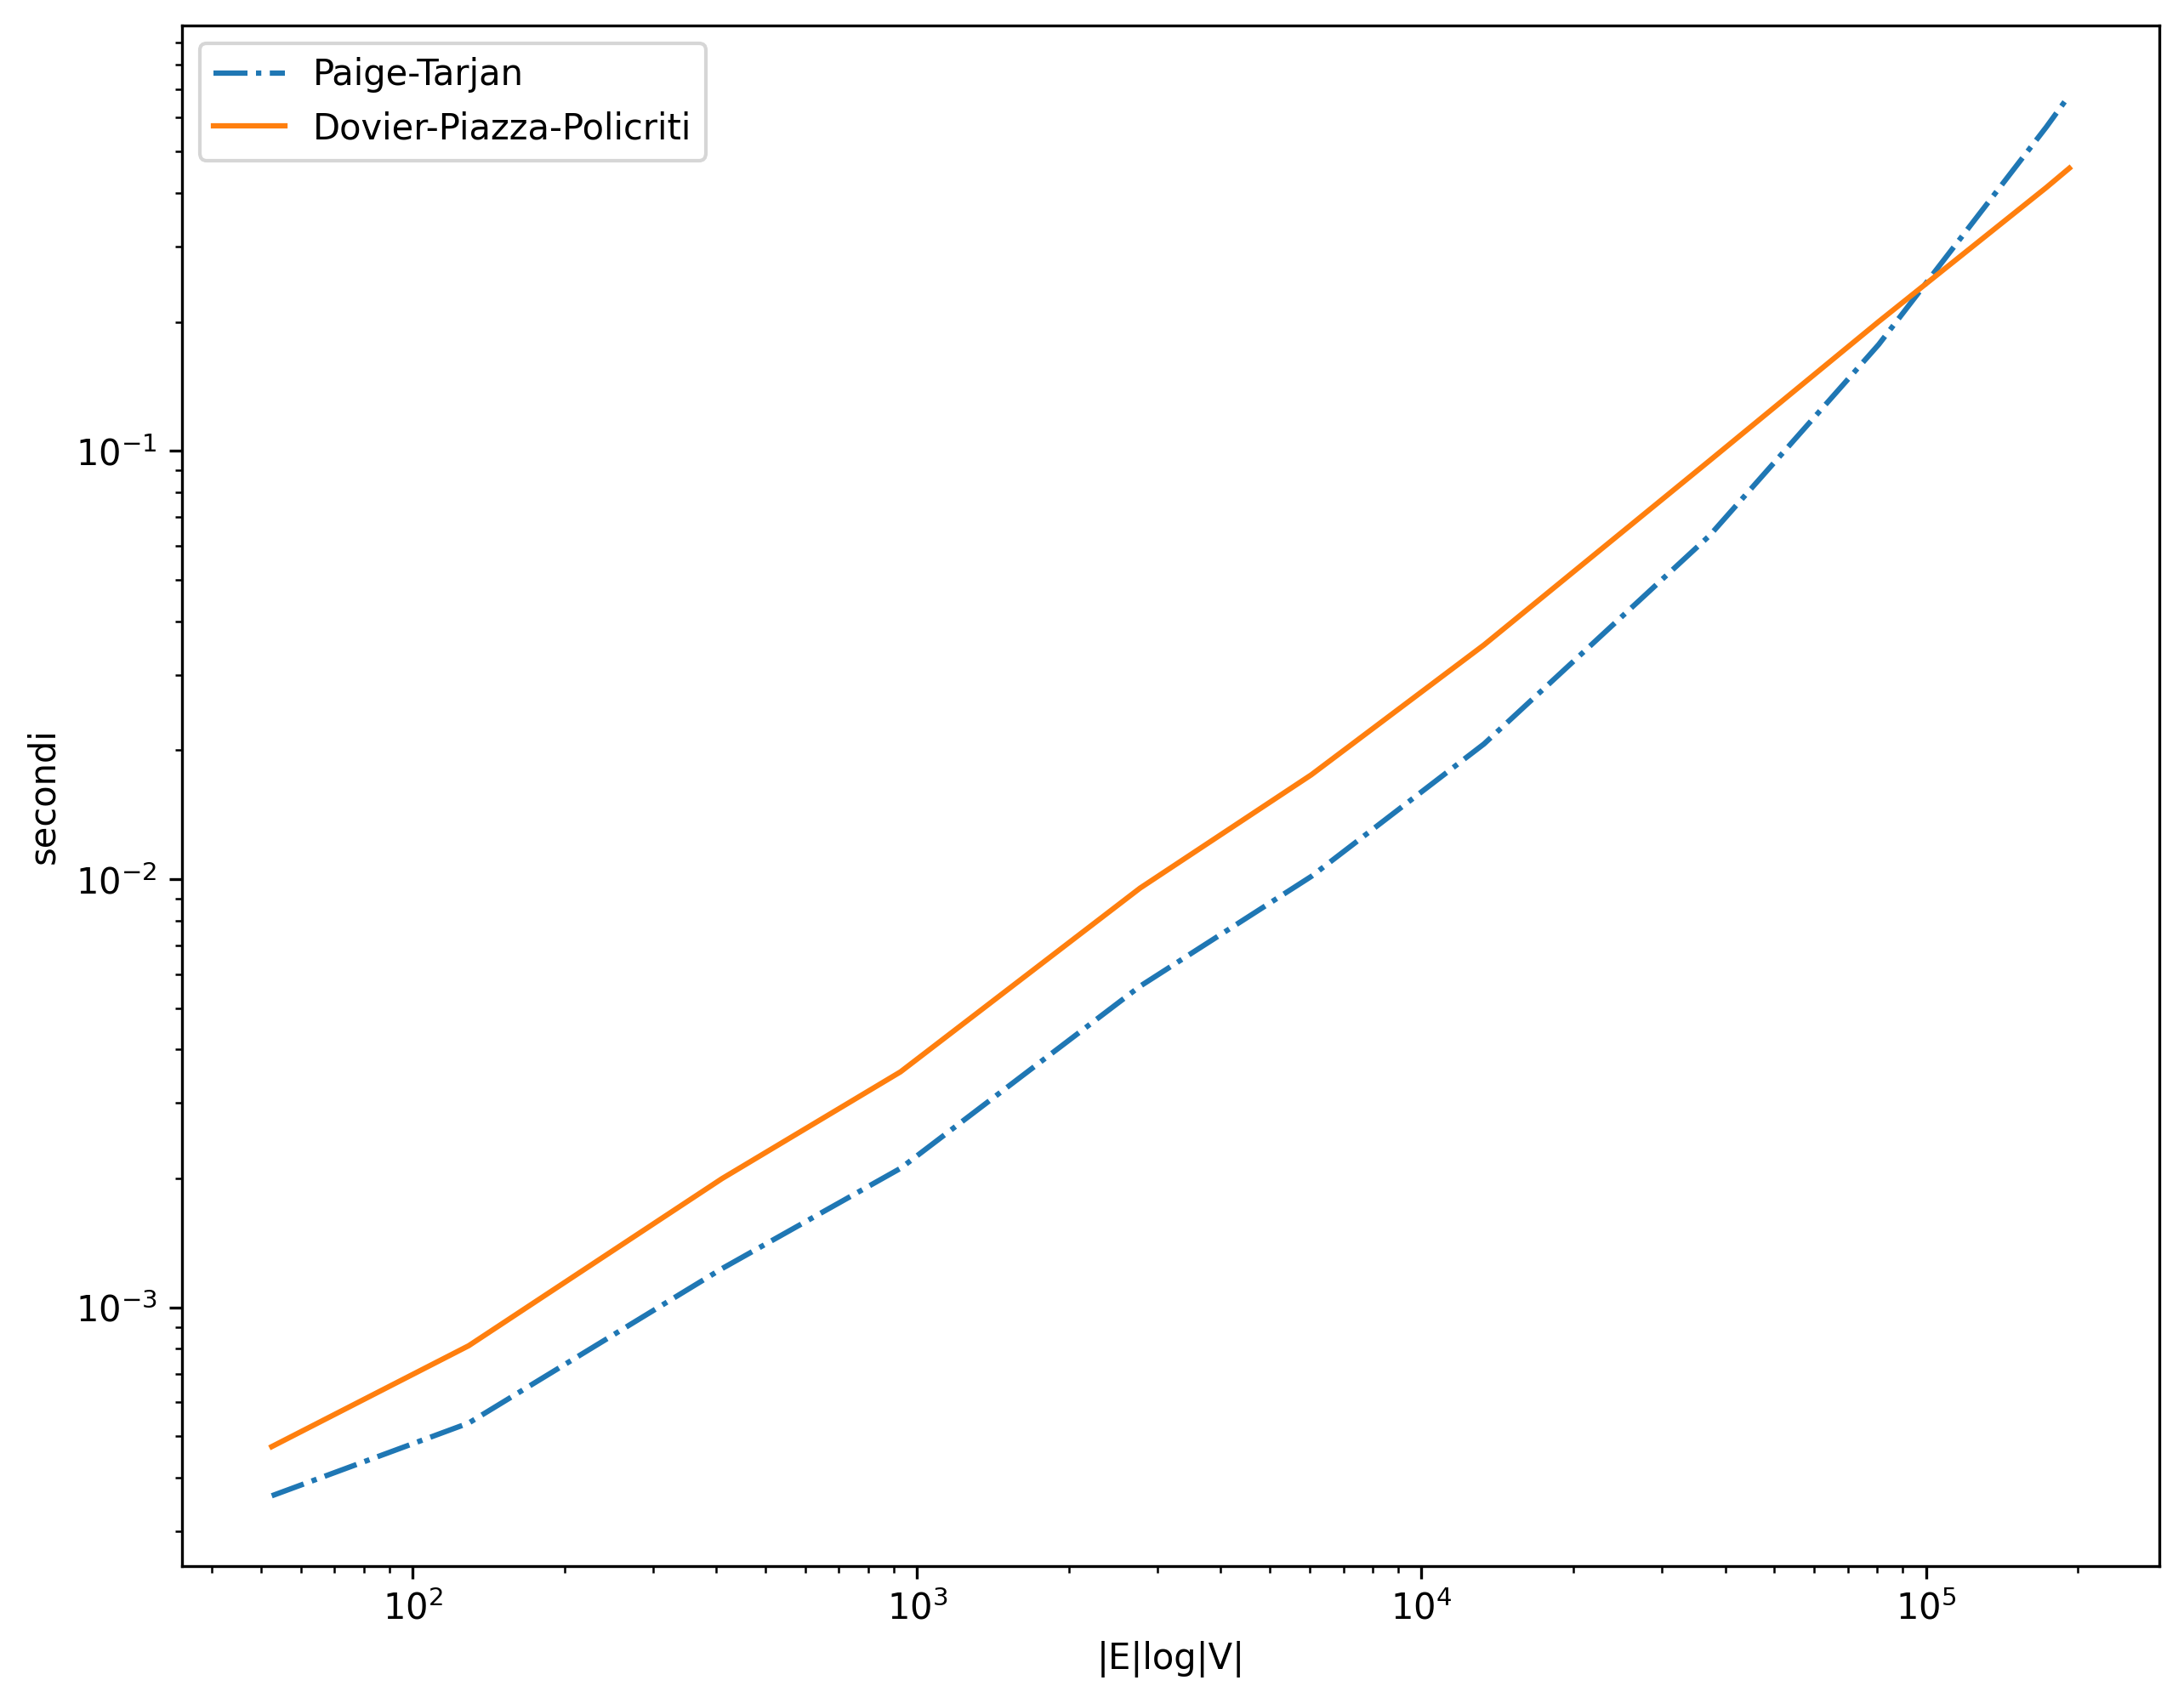

In [55]:
x = [math.log(vec[2]) * vec[3] for vec in data]
x, pta, fba = zip(*sorted(zip(x, data.T[0], data.T[1])))

plt.figure(figsize=(10,8), dpi=300)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.')
plt.plot(x, fba, label='Dovier-Piazza-Policriti')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

## Saha

In [93]:
data = np.array([np.load('tree_saha/result{}.npy'.format(i)) for i in range(6,11)])
data.shape

(5, 3, 10)

In [94]:
linlog_scale = np.apply_along_axis(lambda vec: math.log(vec[0]) * vec[1], 2, data[:,:,-2:]).flatten('C')
print(linlog_scale)
fbas = np.reshape(data[:,:,:4], (len(linlog_scale), 4), 'C')
sahas = np.reshape(data[:,:,4:-2], (len(linlog_scale), 4), 'C')

linlog_scale, fbas, sahas = zip(*sorted(zip(linlog_scale, fbas, sahas)))

linlog_scale = np.array(linlog_scale)
fbas = np.array(fbas)
sahas = np.array(sahas)

[1.16754609e+01 6.10367573e+02 7.64037619e+03 1.45560908e+01
 1.40748094e+03 2.65454681e+04 1.75777966e+01 3.18054849e+03
 9.04720361e+04 2.07232658e+01 7.08296565e+03 3.03879022e+05
 2.39789527e+01 1.55989712e+04 1.00897523e+06]


In [97]:
rm = [1,2,3,6,7,8,9,10,11]

linlog_scale = np.delete(linlog_scale, rm)
fbas = np.delete(fbas, rm, axis=0)
sahas = np.delete(sahas, rm, axis=0)

In [110]:
%pwd

'/Users/francescoandreuzzi/Documents/Universita/Tesi/src/experiments/time'

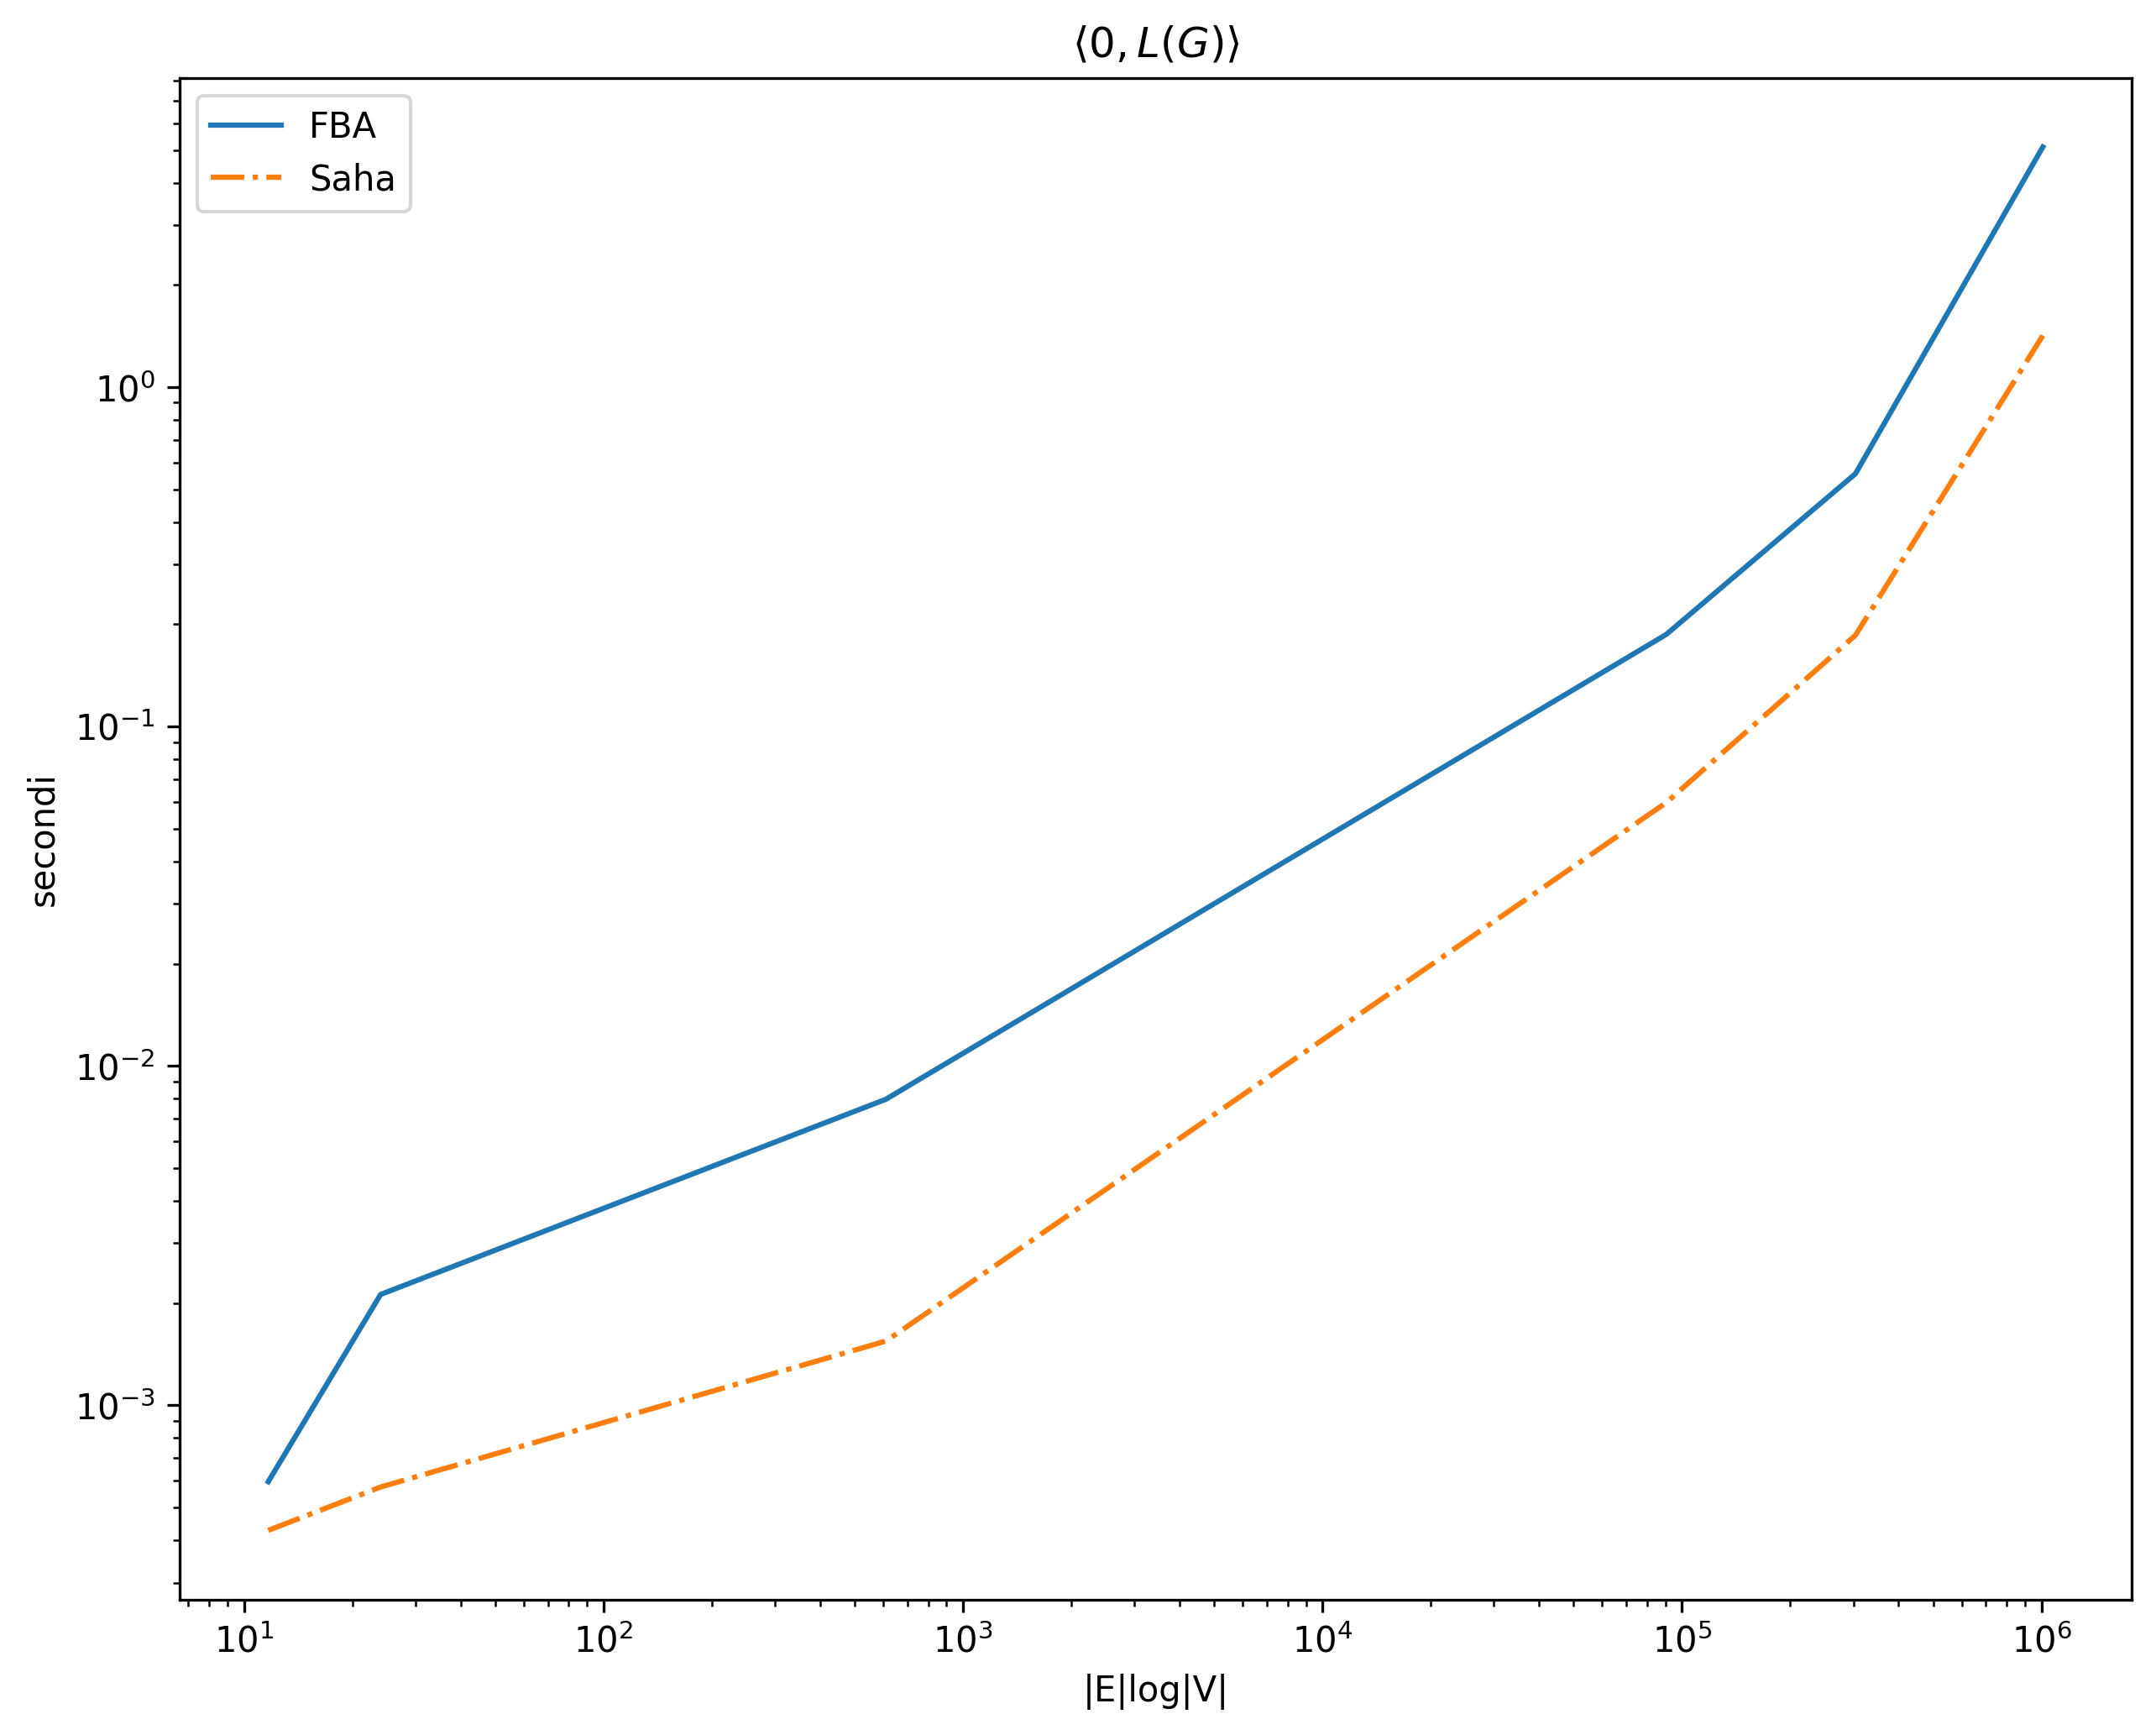

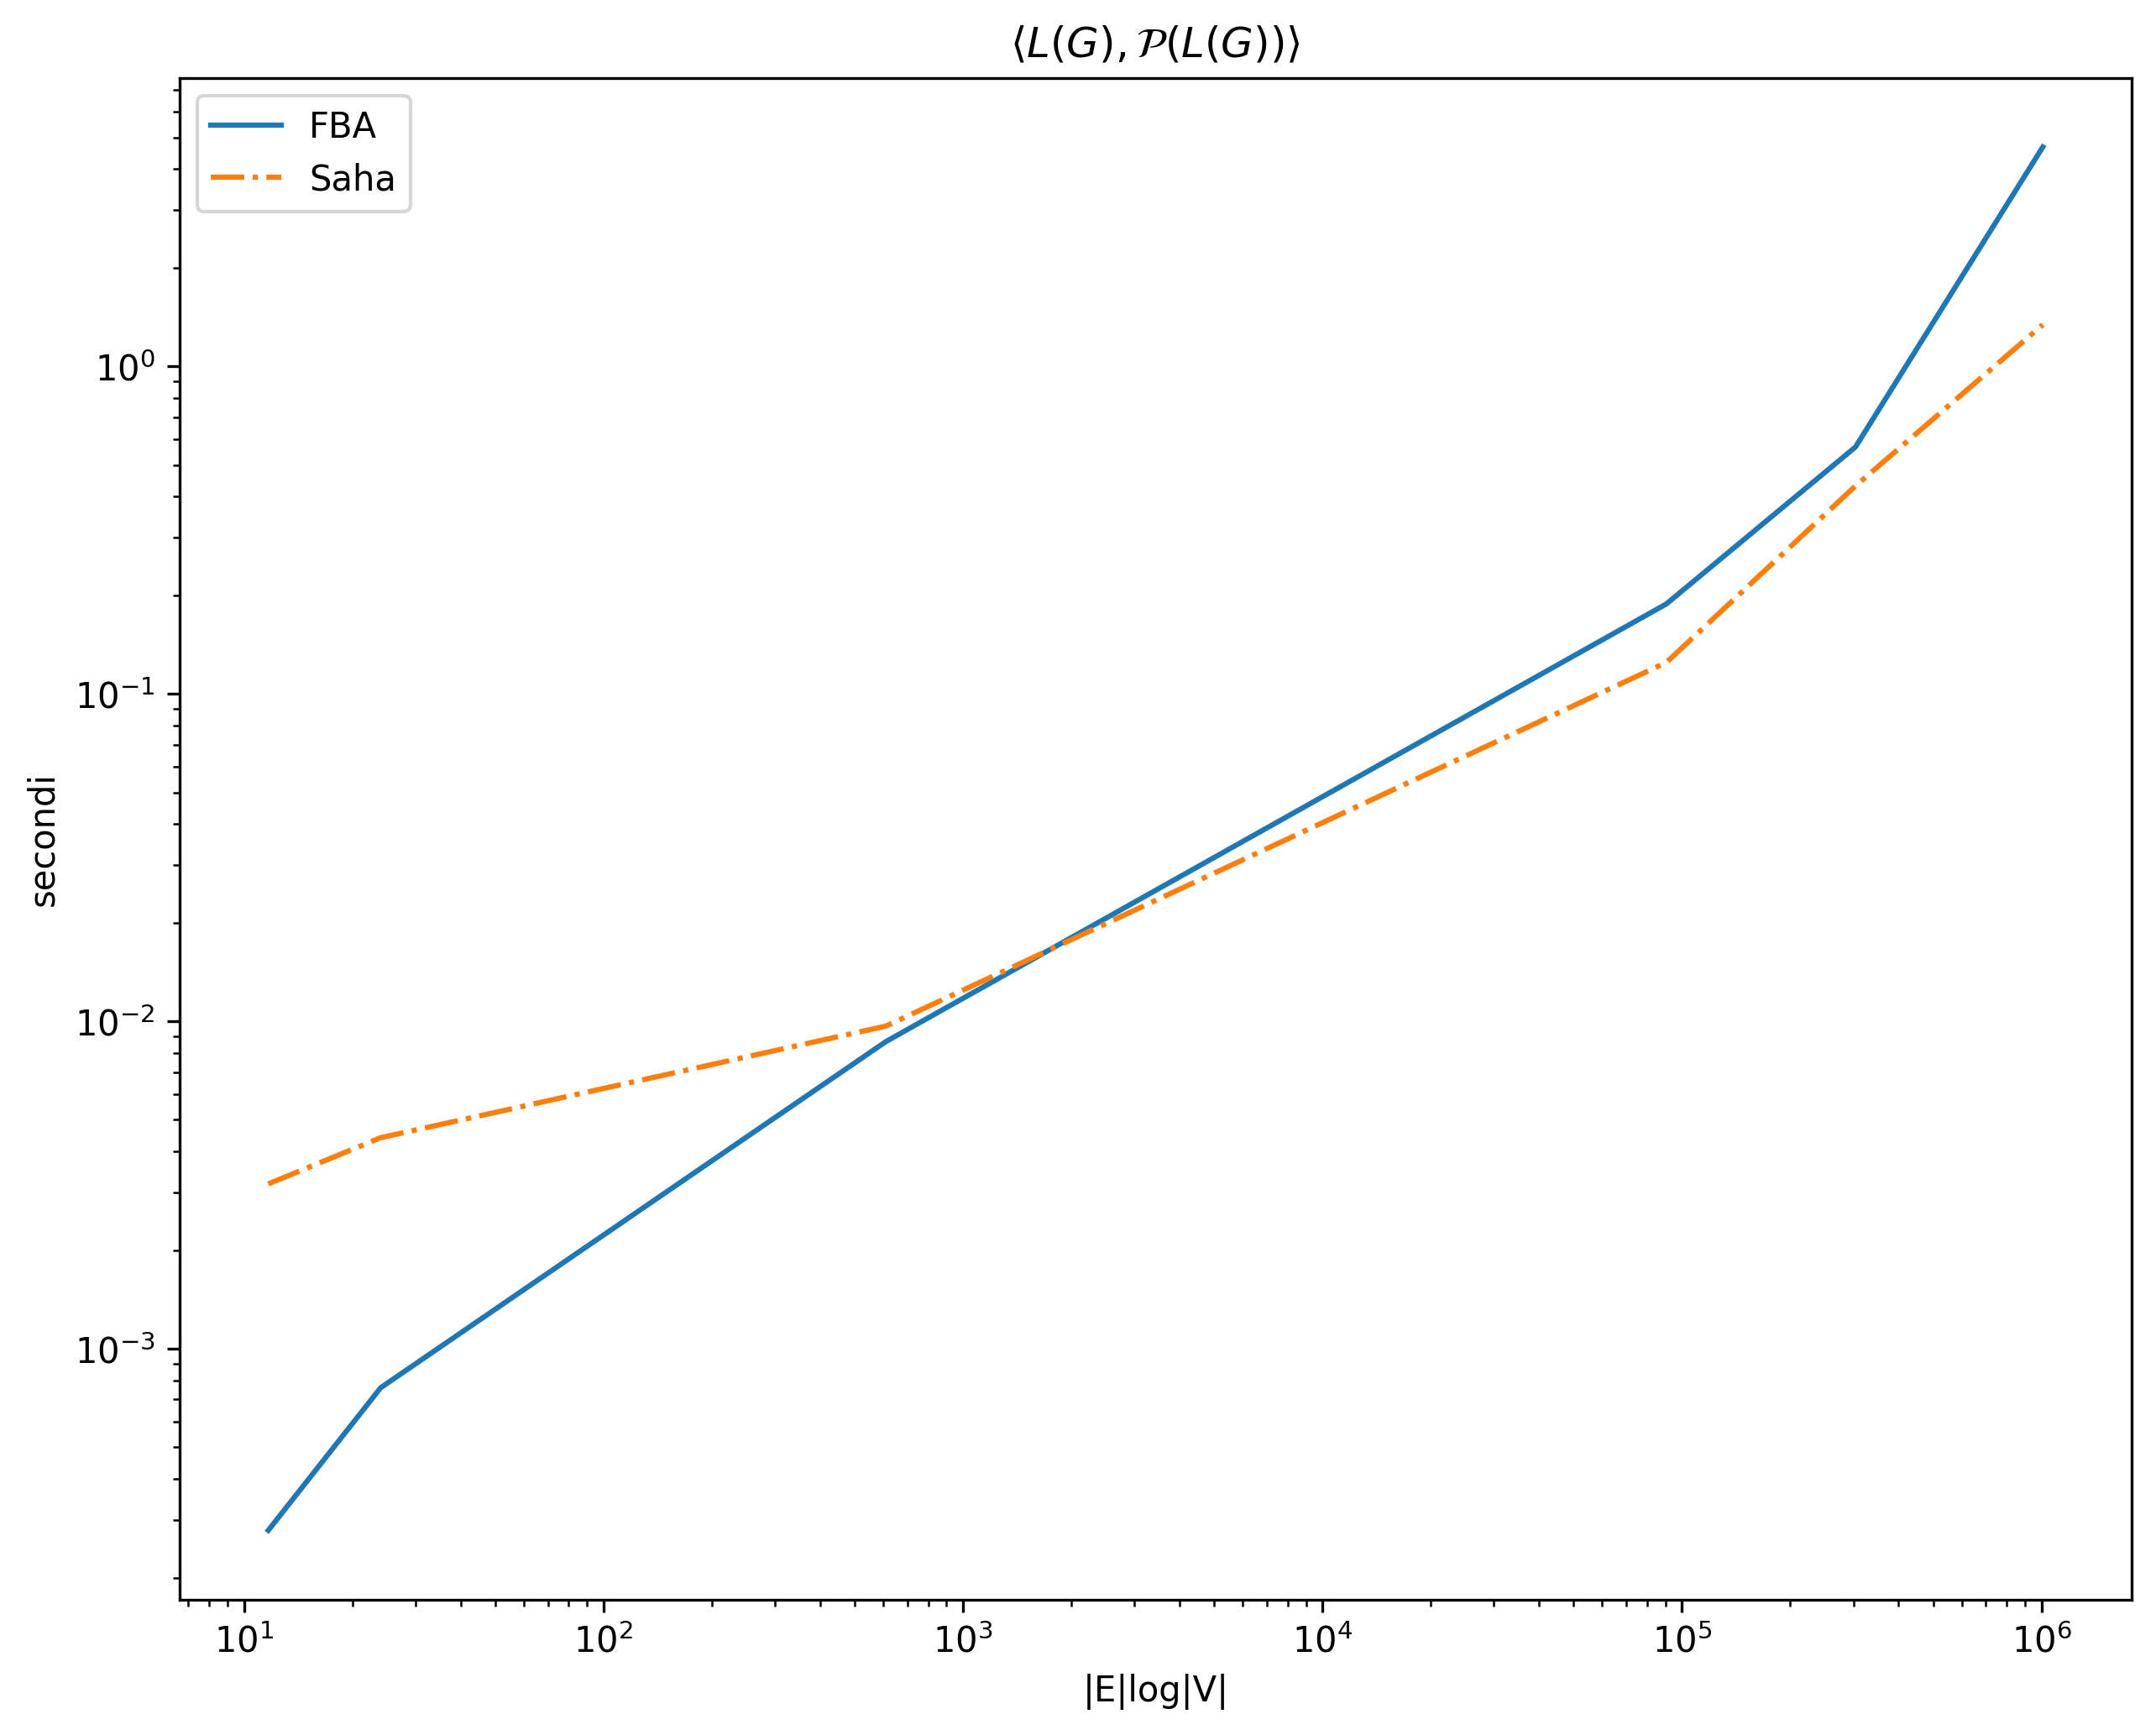

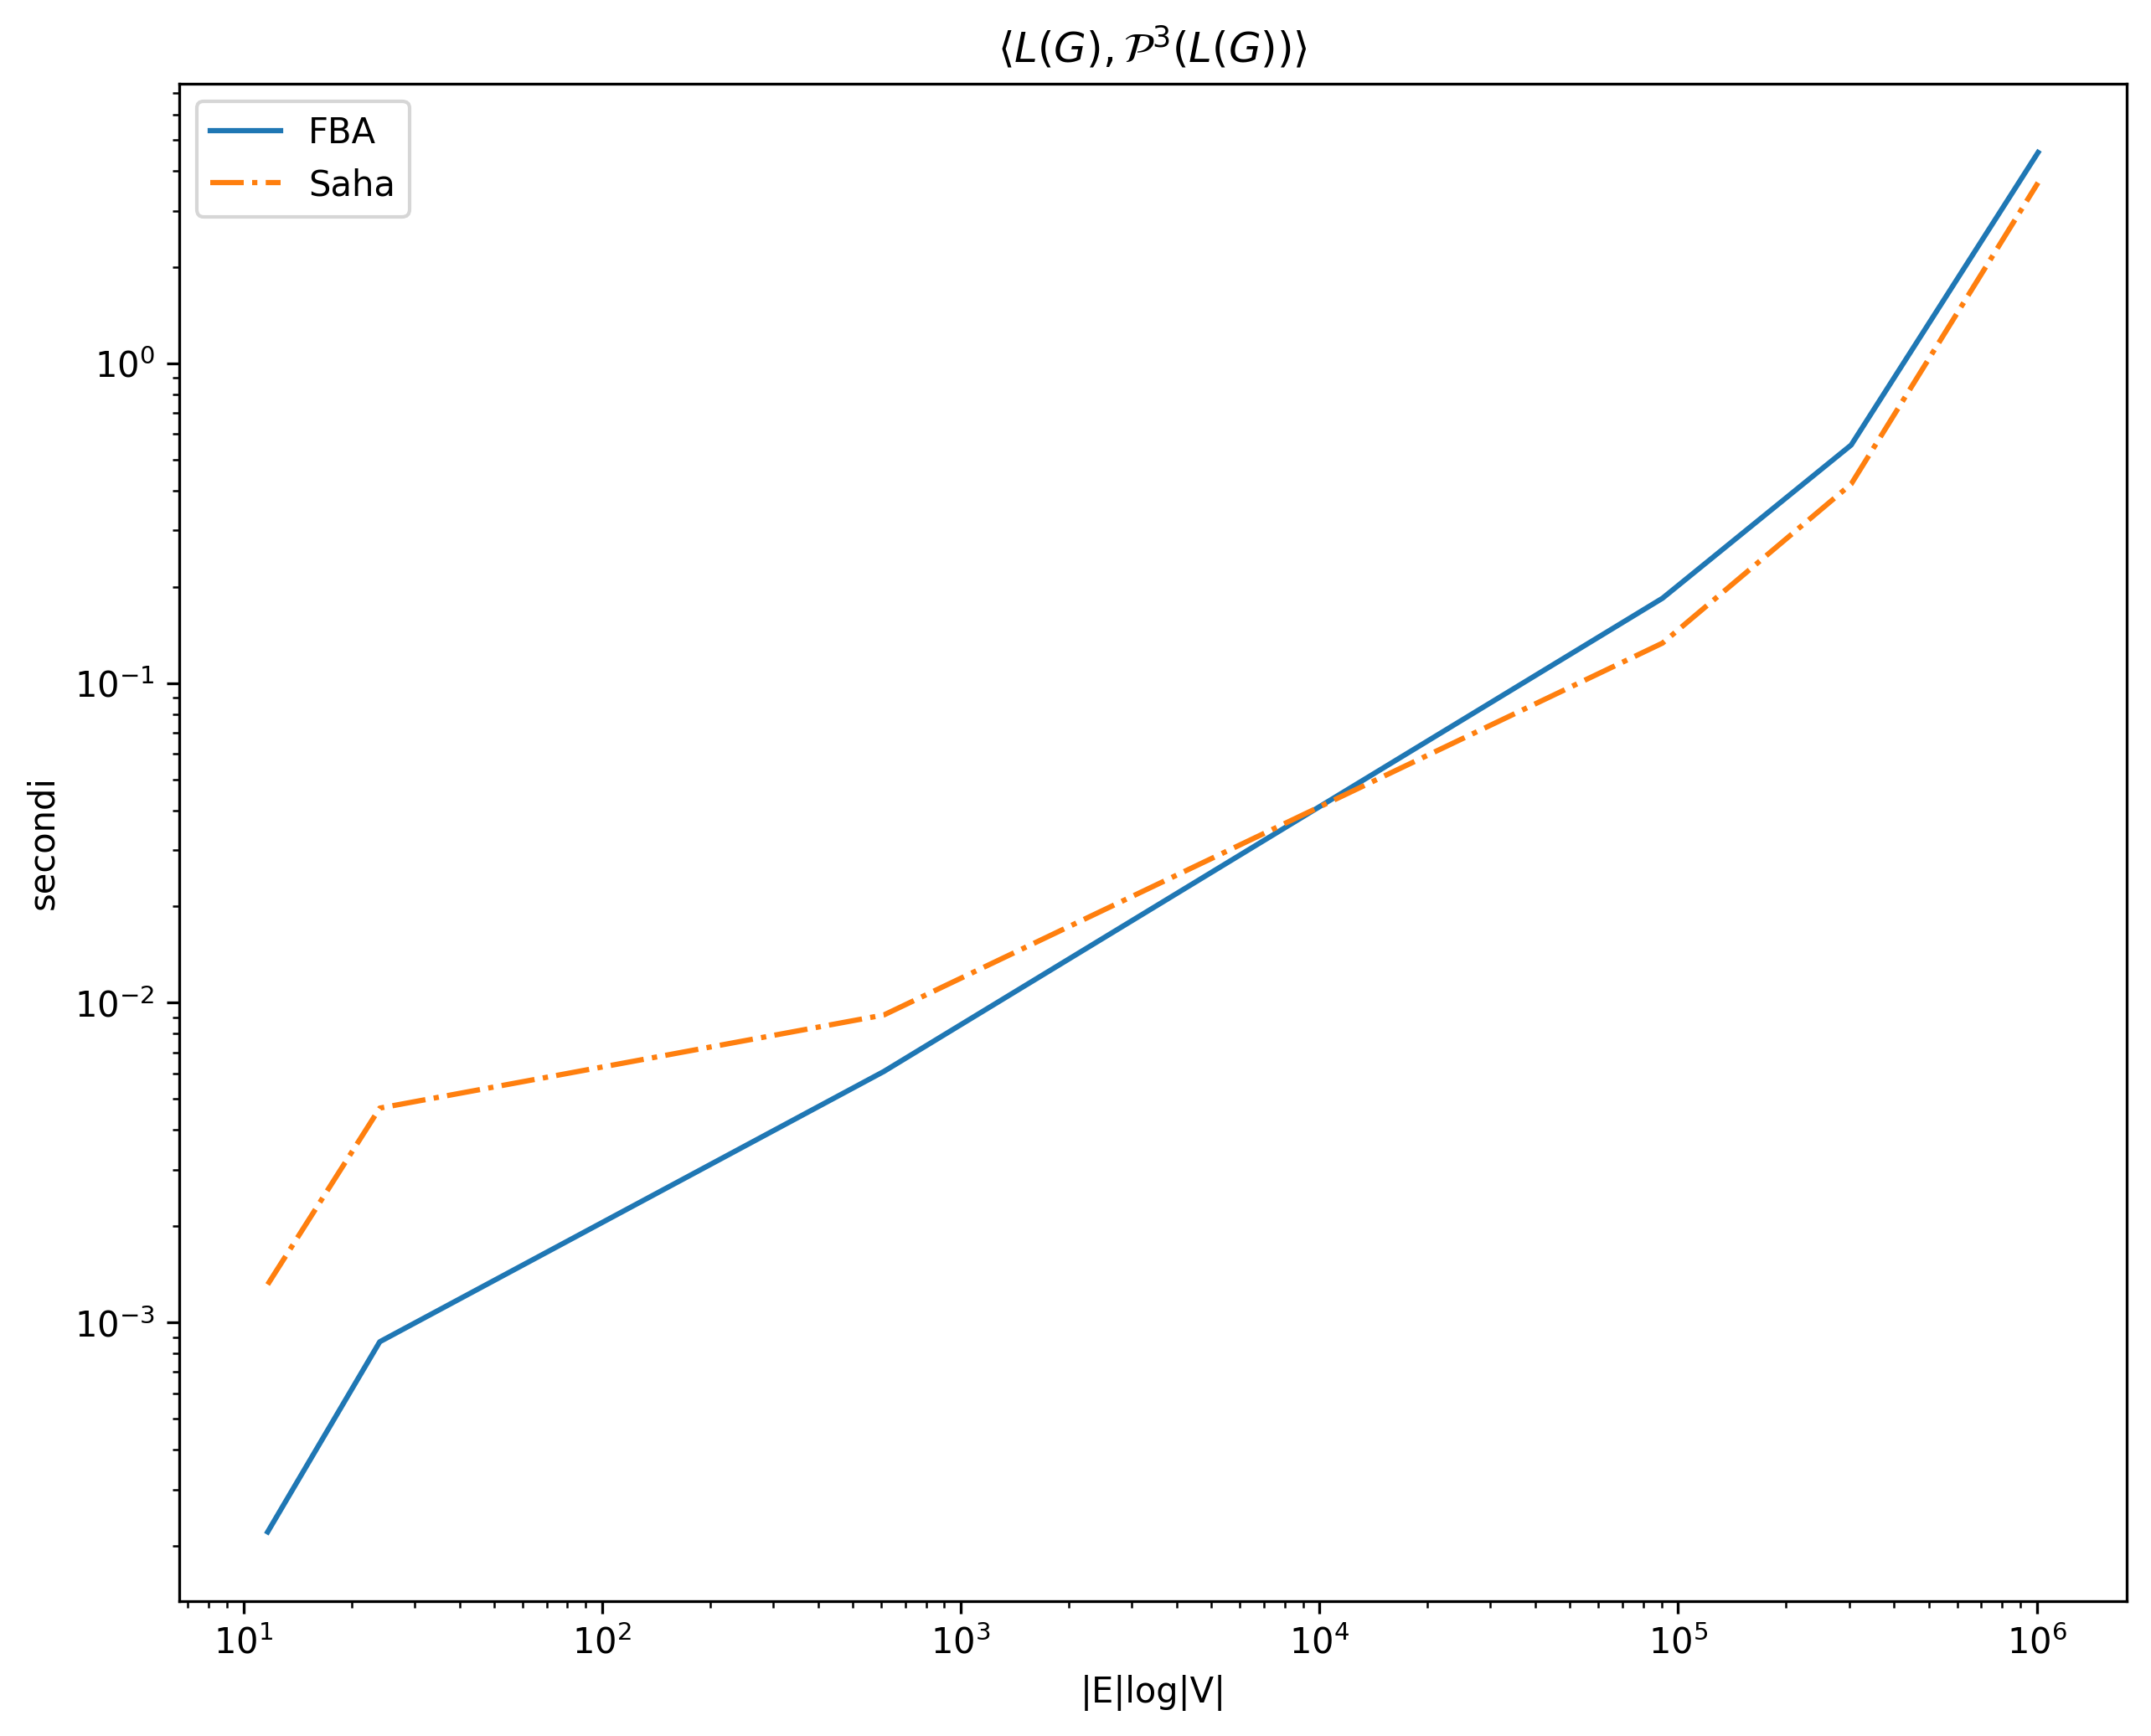

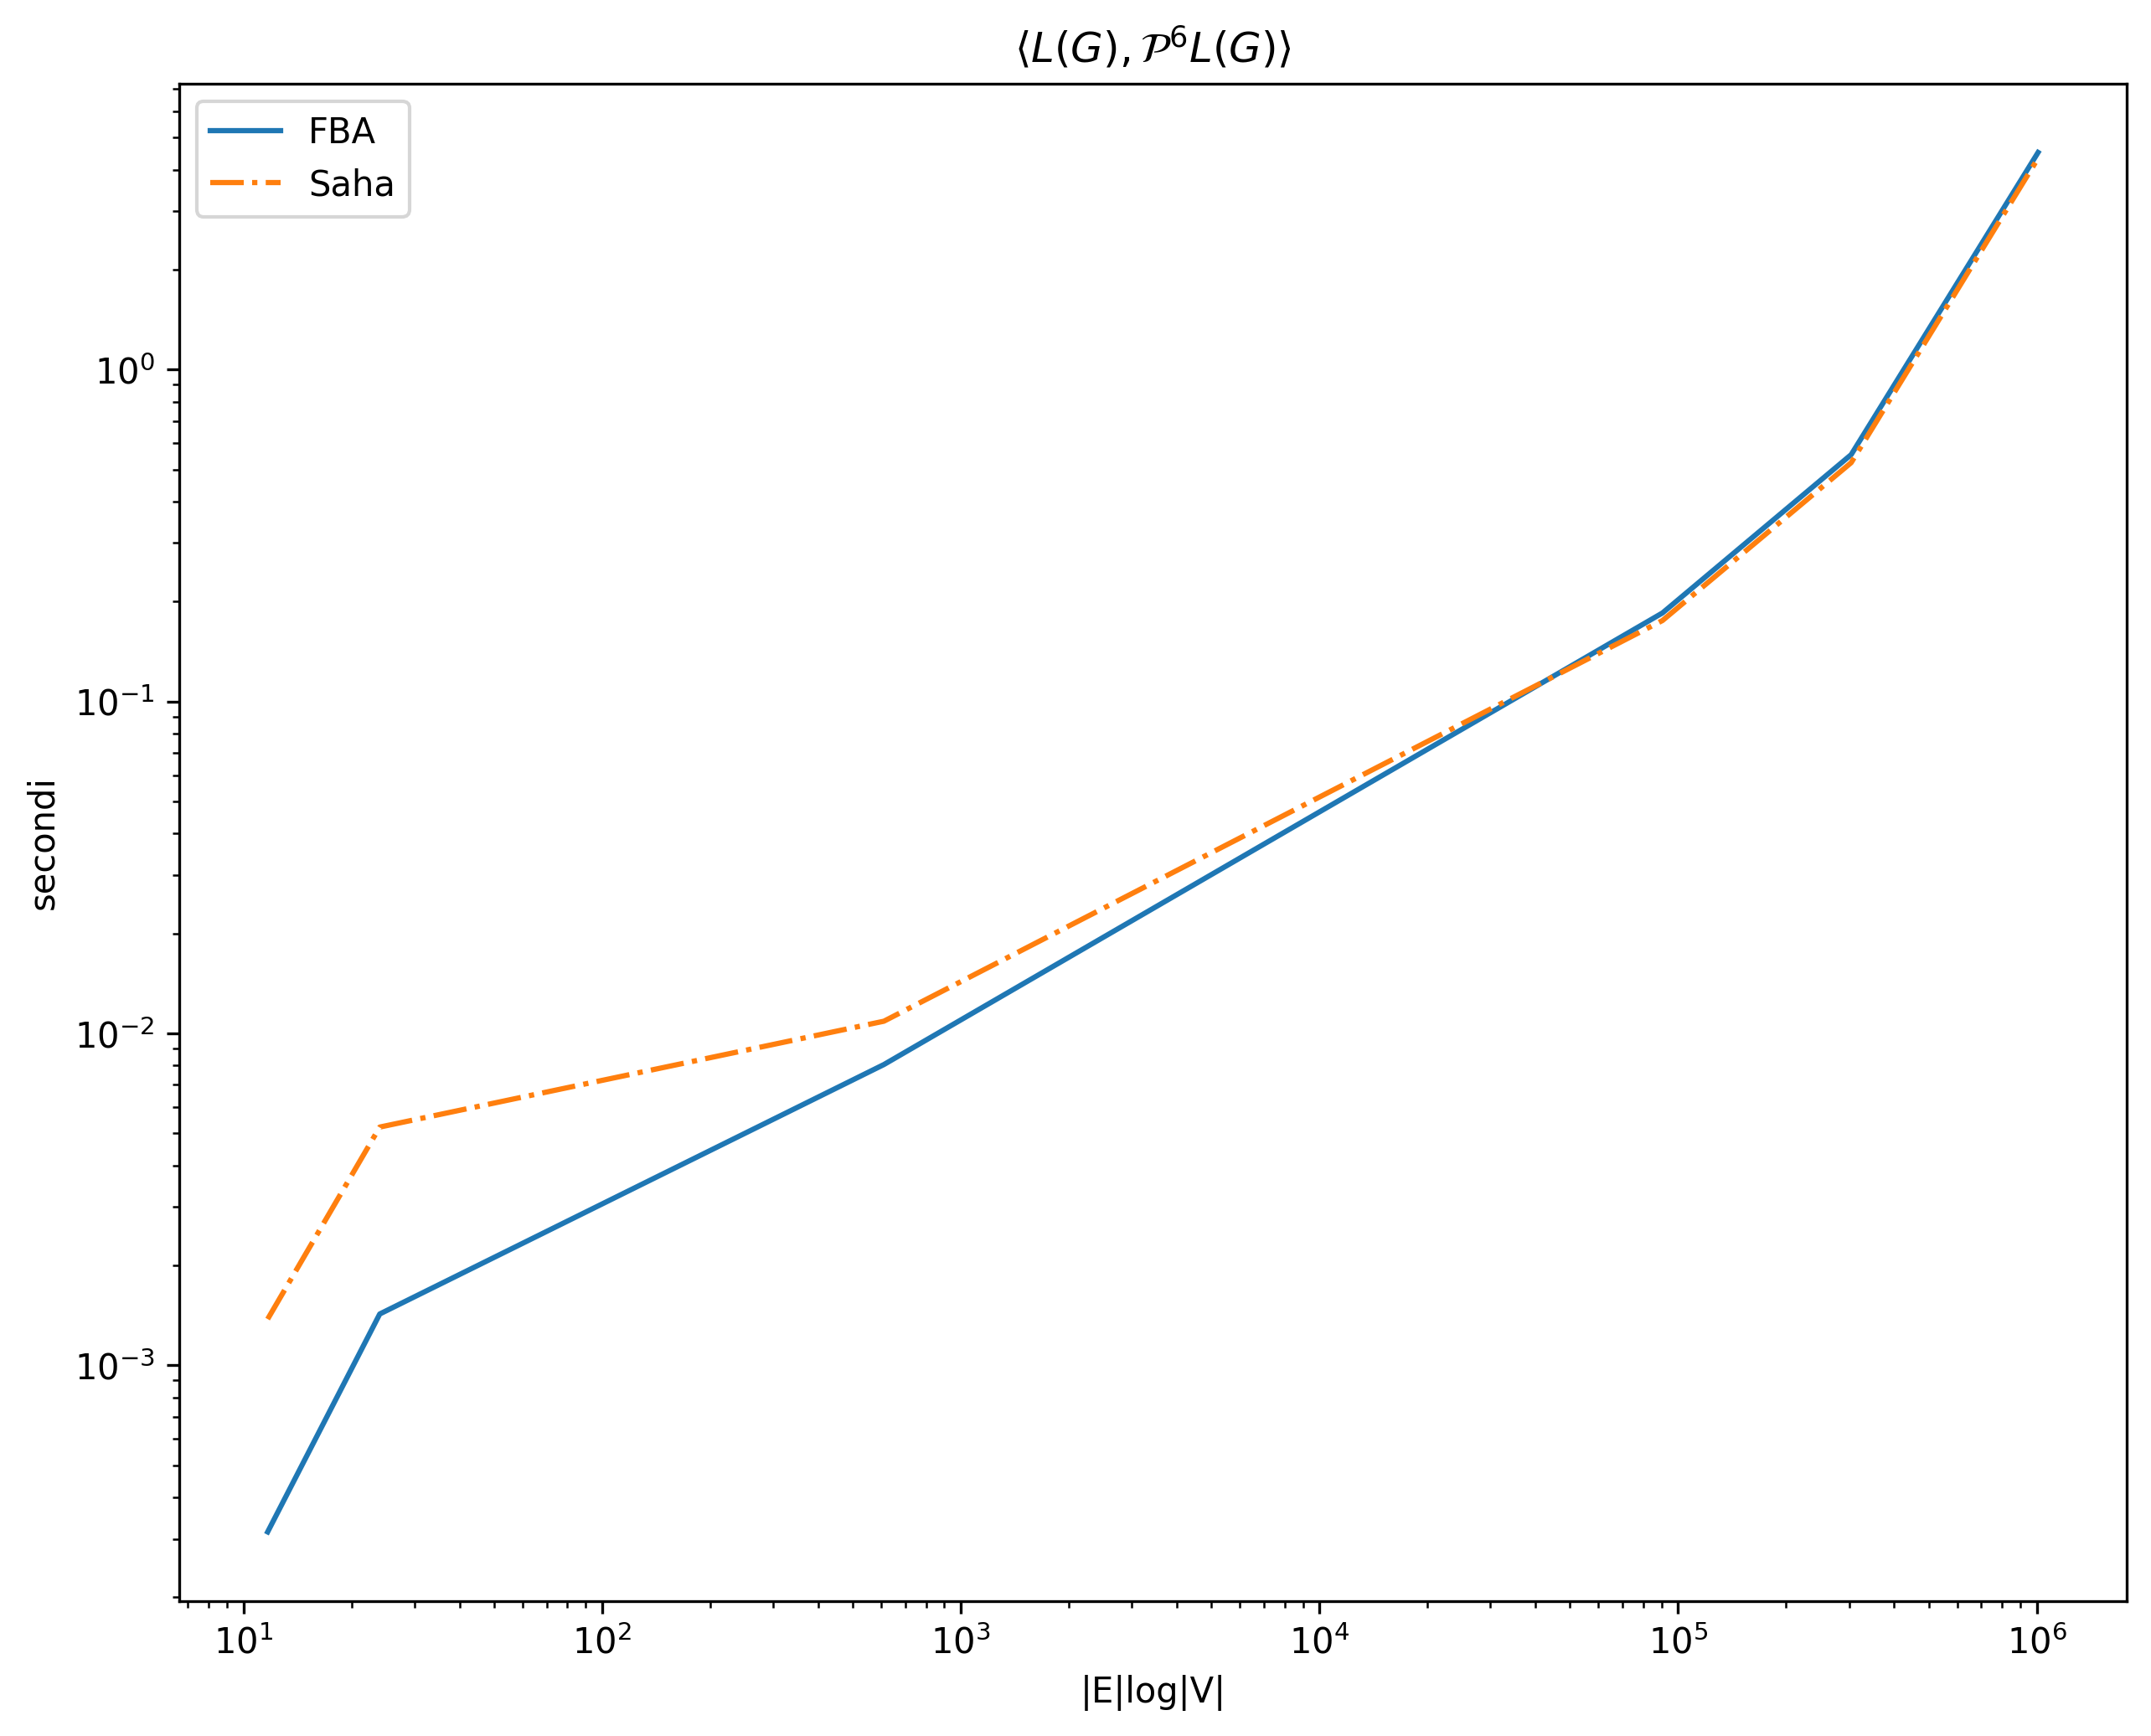

In [111]:
titles = ['$\\langle 0,L(G)\\rangle$', '$\langle L(G),\mathcal{P}(L(G))\\rangle$', 
          '$\\langle L(G),\mathcal{P}^3(L(G))\\rangle$', '$\\langle L(G),\mathcal{P}^6{L(G)}\\rangle$']
indexes = [0,3,2,1]

for test_idx in range(4): 
    plt.figure(figsize=(10,8), dpi=300)
    
    plt.plot(linlog_scale, fbas[:,indexes[test_idx]], label='FBA')
    plt.plot(linlog_scale, sahas[:,indexes[test_idx]], linestyle='-.', label='Saha')
    
    plt.yscale('log')
    plt.xscale('log')
    
    plt.xlabel('|E|log|V|')
    plt.ylabel('secondi')
    
    plt.title(titles[test_idx])
    
    plt.legend()
    plt.savefig('../../sezione3/experimental_results/plots/saha_{}.png'.format(test_idx+1))